## Анализ геномных данных с TCGA, выявление нужных генов через корреляцию

In [ ]:
# Установка библиотек (при необходимости)
!pip install pandas matplotlib seaborn scikit-learn lifelines

# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

# Загрузка данных
from google.colab import files
uploaded = files.upload()  # Загрузите файл через интерфейс Google Colab
file_name = list(uploaded.keys())[0]

# Чтение файла
df = pd.read_csv(file_name)

# Проверка структуры данных
print("Столбцы в датасете:", df.columns.tolist())
print("Пример данных:")
display(df.head())

# Пример анализа: распределение выживаемости
if "Overall Survival (Months)" in df.columns and "Overall Survival Status" in df.columns:
    # Подготовка данных
    survival_data = df[["Overall Survival (Months)", "Overall Survival Status"]].dropna()

    # Разделение на группы
    kmf = KaplanMeierFitter()
    status_alive = survival_data["Overall Survival Status"] == "Alive"
    status_deceased = survival_data["Overall Survival Status"] == "Deceased"

    # Построение кривых выживаемости
    plt.figure(figsize=(10, 6))
    kmf.fit(survival_data["Overall Survival (Months)"][status_alive], label="Выжившие")
    kmf.plot_survival_function()

    kmf.fit(survival_data["Overall Survival (Months)"][status_deceased], label="Умершие")
    kmf.plot_survival_function()

    plt.title("Кривые выживаемости")
    plt.xlabel("Месяцы")
    plt.ylabel("Выживаемость")
    plt.grid()
    plt.show()

# Анализ мутаций и факторов риска
if "Mutation Count" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df["Mutation Count"], bins=50, kde=True)
    plt.title("Распределение количества мутаций")
    plt.xlabel("Количество мутаций")
    plt.ylabel("Частота")
    plt.grid()
    plt.show()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=47a66b88582b79d45ae4533b4205e1e3e49f35d236db2d4228b260e94ff2db1c
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


Saving HierCluster.2024-12-09.csv to HierCluster.2024-12-09.csv
Столбцы в датасете: ['Case', 'H1-0', 'RASD1', 'STAB1', 'FSCN1', 'SLC7A5', 'PPP1R3C', 'GATM', 'PROS1', 'SERPINA1', 'CFH', 'LRG1', 'SERPINF2', 'NDRG2', 'RAP1GAP', 'TESC', 'ANPEP', 'REEP6', 'KCNK5', 'SMIM24', 'TPPP3', 'DEFB1', 'AQP1', 'TMEM37', 'CYP1B1', 'IGFBP3', 'FBP1', 'VSIG2', 'GATA3', 'TBX3', 'MGST1', 'RARRES1', 'NRN1', 'TSPAN13', 'ALDH1A1', 'MGP', 'ERBB2', 'GRB7', 'PTGR1', 'AKR1C3', 'RBP7', 'CBR1', 'GSTP1', 'EGFR', 'IGFBP6', 'F3', 'EFEMP1', 'RRAD', 'PLAT', 'EMP1', 'ACKR3', 'ECM1', 'CX3CL1', 'APOL1', 'TYMP', 'CXCL10', 'GBP1', 'LAMP3', 'TNFSF10', 'ANGPTL4', 'NDUFA4L2', 'SLC2A1', 'ADM', 'NDRG1', 'DHRS3', 'EMP2', 'EGLN3', 'PTGES', 'HSPB8', 'THBD', 'ANXA1', 'GJB2', 'AQP3', 'IL1RN', 'CNFN', 'S100A9', 'DSC2', 'CSTA', 'CSTB', 'FABP5', 'S100A8', 'FGFR3', 'PTPN13', 'CAV1', 'CAV2', 'PLAU', 'LAMB3', 'LAMC2', 'P3H2', 'RAB38', 'EVPL', 'ID1', 'FAM110C', 'HSPB1', 'S100A11', 'RHOD', 'PACSIN3', 'KRT19', 'S100A14', 'S100A16', 'CLDN1', 'FZ

Case      H1-0     RASD1     STAB1     FSCN1    SLC7A5  \
0      TCGA-G8-6326 -0.961066  0.181566 -0.013844 -0.629145  0.004290   
1  TARGET-40-PARJXU  0.040192  2.740854 -0.158447  1.282035  2.264286   
2  TARGET-40-0A4I6O -0.434697  0.258918 -0.162356  1.546800  0.758072   
3  TARGET-20-PAWZLW  6.000730 -0.251308 -0.187881 -0.915657  3.540561   
4  TARGET-20-PAPXWI -0.140781 -0.251459 -0.065436  2.099210  0.609911   

     PPP1R3C      GATM     PROS1  SERPINA1  ...     TRIB1    CSRNP1      KLF6  \
0  -0.244673 -0.379926 -0.487172  1.290067  ... -0.405363 -0.455494 -0.422337   
1   0.044923 -0.446688 -0.272620 -0.252160  ... -0.400184  0.361374  1.568604   
2  11.251712  0.030134  2.922182 -0.245328  ... -0.520189 -0.410039 -0.392707   
3  -0.277384 -0.459995  4.872748 -0.131290  ...  2.294299  0.629311  1.106528   
4  -0.285800 -0.360803 -0.764416  0.089044  ...  1.266161  4.843435  0.237959   

   PPP1R15A     CCNL1    NFKBIZ     TAGAP       MME    CAVIN2    CXCL12  
0 -0.439838 -0.446190 -0.455094  0.162021 -0.299231 -0.290342  1.668417  
1  0.833621 -0.295749 -0.102452 -0.402174  0.845292 -0.318693  0.126014  
2 -0.277039 -0.511316 -0.410613 -0.448779  0.078203 -0.361670 -0.426820  
3  4.619587  3.683983  4.598633  4.187197  0.255206 -0.285040 -0.489525  
4  4.253877 -0.433471 -0.156890  0.686973 -0.390518 -0.238772 -0.494694  

[5 rows x 1000 columns]

from matplotlib import pyplot as plt
_df_0['H1-0'].plot(kind='hist', bins=20, title='H1-0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['RASD1'].plot(kind='hist', bins=20, title='RASD1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['STAB1'].plot(kind='hist', bins=20, title='STAB1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['FSCN1'].plot(kind='hist', bins=20, title='FSCN1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Case').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='H1-0', y='RASD1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='RASD1', y='STAB1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='STAB1', y='FSCN1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='FSCN1', y='SLC7A5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ANPEP']
  ys = series['H1-0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('ANPEP', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Case')):
  _plot_series(series, series_name, i)
  fig.legend(title='Case', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ANPEP')
_ = plt.ylabel('H1-0')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ANPEP']
  ys = series['RASD1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('ANPEP', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Case')):
  _plot_series(series, series_name, i)
  fig.legend(title='Case', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ANPEP')
_ = plt.ylabel('RASD1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ANPEP']
  ys = series['STAB1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('ANPEP', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Case')):
  _plot_series(series, series_name, i)
  fig.legend(title='Case', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ANPEP')
_ = plt.ylabel('STAB1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ANPEP']
  ys = series['FSCN1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('ANPEP', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Case')):
  _plot_series(series, series_name, i)
  fig.legend(title='Case', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ANPEP')
_ = plt.ylabel('FSCN1')

from matplotlib import pyplot as plt
_df_13['H1-0'].plot(kind='line', figsize=(8, 4), title='H1-0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['RASD1'].plot(kind='line', figsize=(8, 4), title='RASD1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['STAB1'].plot(kind='line', figsize=(8, 4), title='STAB1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['FSCN1'].plot(kind='line', figsize=(8, 4), title='FSCN1')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Case'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='H1-0', y='Case', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Case'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='RASD1', y='Case', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Case'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='STAB1', y='Case', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Case'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='FSCN1', y='Case', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

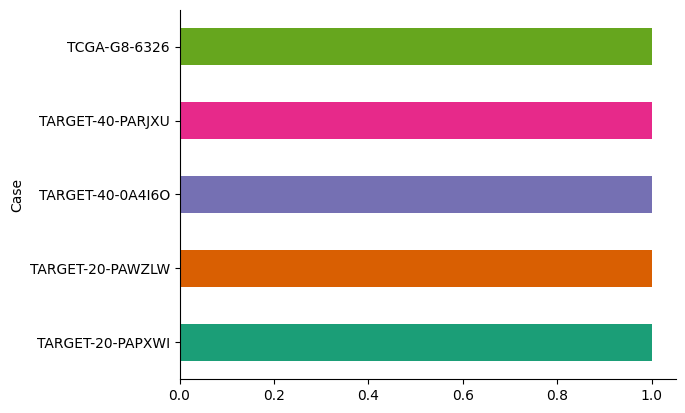

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Case').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

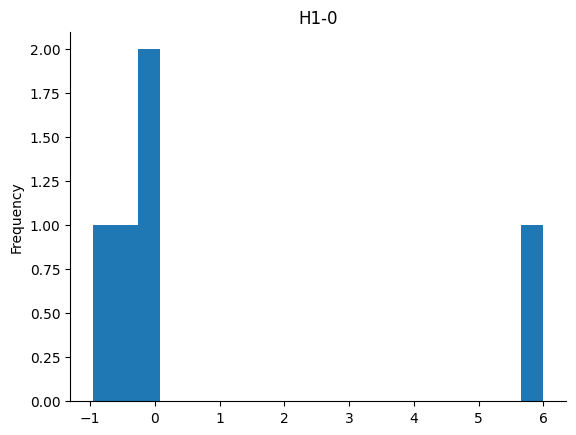

In [ ]:
from matplotlib import pyplot as plt
_df_0['H1-0'].plot(kind='hist', bins=20, title='H1-0')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Установка необходимых библиотек (если они ещё не установлены)
!pip install pandas matplotlib seaborn lifelines

# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

# Загрузка файла через интерфейс
from google.colab import files
uploaded = files.upload()

# Чтение файла в DataFrame
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Проверка структуры данных
print("Данные загружены! Столбцы в файле:")
print(data.columns.tolist())
display(data.head())

Saving msk_impact_2017_clinical_data.csv to msk_impact_2017_clinical_data (1).csv
Данные загружены! Столбцы в файле:
['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type', 'Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered', 'Matched Status', 'Metastatic Site', 'Mutation Count', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'Primary Tumor Site', 'Sample Class', 'Sample Collection Source', 'Number of Samples Per Patient', 'Sample coverage', 'Sample Type', 'Sex', 'Smoking History', 'Somatic Status', 'Specimen Preservation Type', 'Specimen Type', 'TMB (nonsynonymous)', 'Tumor Purity', "Patient's Vital Status"]


Study ID Patient ID          Sample ID         Cancer Type  \
0  msk_impact_2017  P-0000004  P-0000004-T01-IM3       Breast Cancer   
1  msk_impact_2017  P-0000015  P-0000015-T01-IM3       Breast Cancer   
2  msk_impact_2017  P-0000023  P-0000023-T01-IM3        Mesothelioma   
3  msk_impact_2017  P-0000024  P-0000024-T01-IM3  Endometrial Cancer   
4  msk_impact_2017  P-0000025  P-0000025-T01-IM3  Endometrial Cancer   

                                Cancer Type Detailed  DNA Input  \
0                   Breast Invasive Ductal Carcinoma      250.0   
1                   Breast Invasive Ductal Carcinoma      198.0   
2                            Peritoneal Mesothelioma      250.0   
3                     Uterine Endometrioid Carcinoma      250.0   
4  Uterine Serous Carcinoma/Uterine Papillary Ser...      250.0   

   Fraction Genome Altered Matched Status Metastatic Site  Mutation Count  \
0                   0.2782        Matched             NaN              16   
1                   0.3503        Matched           Liver               7   
2                   0.1596        Matched             NaN               5   
3                   0.3878        Matched            Lung               6   
4                   0.0000        Matched             NaN               1   

   ... Sample coverage  Sample Type     Sex   Smoking History Somatic Status  \
0  ...             428      Primary  Female           Unknown        Matched   
1  ...             281   Metastasis  Female             Never        Matched   
2  ...             454      Primary    Male             Never        Matched   
3  ...            1016   Metastasis  Female  Prev/Curr Smoker        Matched   
4  ...            1161      Primary  Female             Never        Matched   

  Specimen Preservation Type  Specimen Type  TMB (nonsynonymous) Tumor Purity  \
0                       FFPE         Biopsy            17.746485         50.0   
1                       FFPE         Biopsy             7.764087         40.0   
2                       FFPE         Biopsy             5.545777         30.0   
3                       FFPE      Resection             6.654932         40.0   
4                       FFPE      Resection             1.109155          NaN   

  Patient's Vital Status  
0                  ALIVE  
1               DECEASED  
2               DECEASED  
3                  ALIVE  
4                  ALIVE  

[5 rows x 27 columns]

from matplotlib import pyplot as plt
_df_21['DNA Input'].plot(kind='hist', bins=20, title='DNA Input')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Fraction Genome Altered'].plot(kind='hist', bins=20, title='Fraction Genome Altered')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Mutation Count'].plot(kind='hist', bins=20, title='Mutation Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['Overall Survival (Months)'].plot(kind='hist', bins=20, title='Overall Survival (Months)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('Patient ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('Sample ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('Cancer Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('Cancer Type Detailed').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='DNA Input', y='Fraction Genome Altered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='Fraction Genome Altered', y='Mutation Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='Mutation Count', y='Overall Survival (Months)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='Overall Survival (Months)', y='Number of Samples Per Patient', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Number of Samples Per Patient']
  ys = series['DNA Input']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('Number of Samples Per Patient', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Patient ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Patient ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Number of Samples Per Patient')
_ = plt.ylabel('DNA Input')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Number of Samples Per Patient']
  ys = series['DNA Input']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_34.sort_values('Number of Samples Per Patient', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sample ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sample ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Number of Samples Per Patient')
_ = plt.ylabel('DNA Input')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Number of Samples Per Patient']
  ys = series['DNA Input']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_35.sort_values('Number of Samples Per Patient', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cancer Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cancer Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Number of Samples Per Patient')
_ = plt.ylabel('DNA Input')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Number of Samples Per Patient']
  ys = series['DNA Input']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('Number of Samples Per Patient', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cancer Type Detailed')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cancer Type Detailed', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Number of Samples Per Patient')
_ = plt.ylabel('DNA Input')

from matplotlib import pyplot as plt
_df_37['DNA Input'].plot(kind='line', figsize=(8, 4), title='DNA Input')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Fraction Genome Altered'].plot(kind='line', figsize=(8, 4), title='Fraction Genome Altered')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Mutation Count'].plot(kind='line', figsize=(8, 4), title='Mutation Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_40['Overall Survival (Months)'].plot(kind='line', figsize=(8, 4), title='Overall Survival (Months)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sample ID'].value_counts()
    for x_label, grp in _df_41.groupby('Patient ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Patient ID')
_ = plt.ylabel('Sample ID')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cancer Type'].value_counts()
    for x_label, grp in _df_42.groupby('Sample ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sample ID')
_ = plt.ylabel('Cancer Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cancer Type Detailed'].value_counts()
    for x_label, grp in _df_43.groupby('Cancer Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cancer Type')
_ = plt.ylabel('Cancer Type Detailed')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Metastatic Site'].value_counts()
    for x_label, grp in _df_44.groupby('Cancer Type Detailed')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cancer Type Detailed')
_ = plt.ylabel('Metastatic Site')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['Patient ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='DNA Input', y='Patient ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['Sample ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='DNA Input', y='Sample ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_47['Cancer Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_47, x='DNA Input', y='Cancer Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_48['Cancer Type Detailed'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_48, x='DNA Input', y='Cancer Type Detailed', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

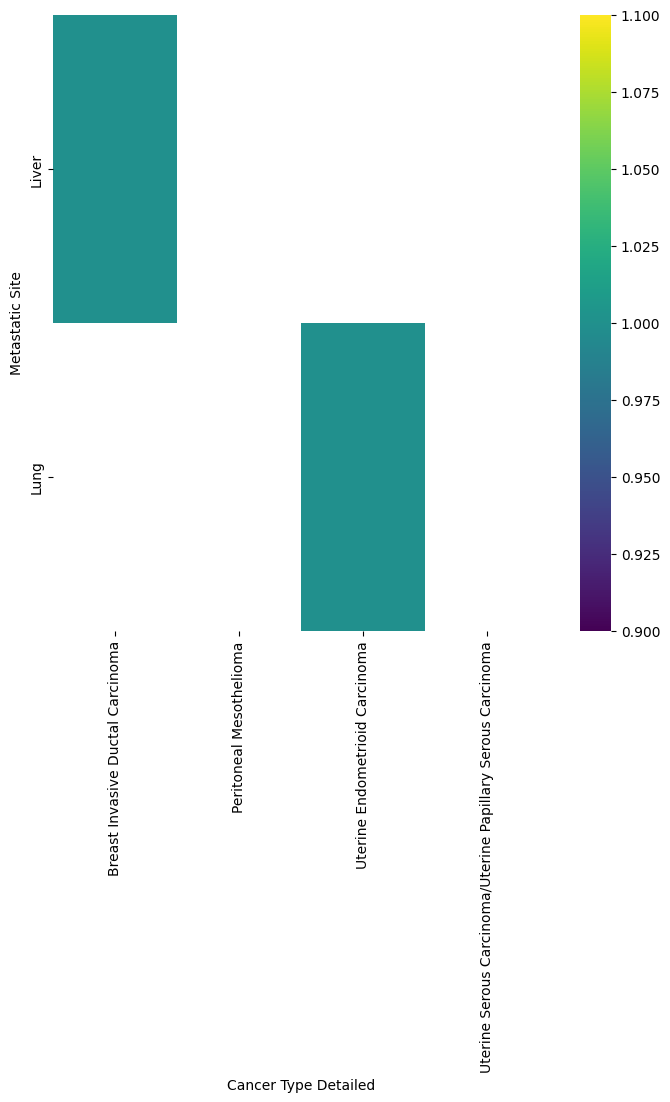

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Metastatic Site'].value_counts()
    for x_label, grp in _df_44.groupby('Cancer Type Detailed')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cancer Type Detailed')
_ = plt.ylabel('Metastatic Site')

<ipython-input-34-bf305bd4c71b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_48, x='DNA Input', y='Cancer Type Detailed', inner='stick', palette='Dark2')


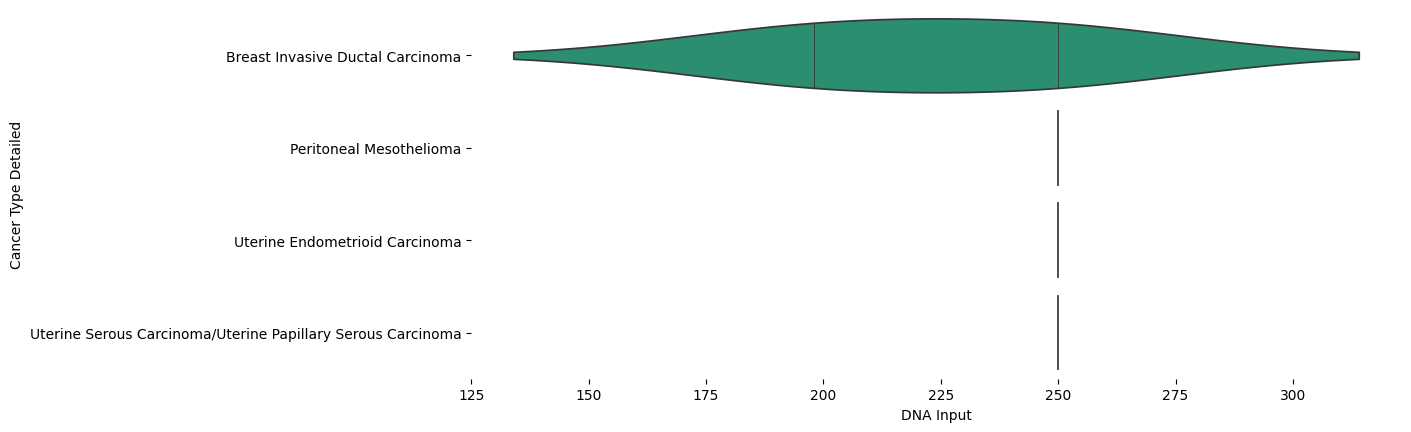

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_48['Cancer Type Detailed'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_48, x='DNA Input', y='Cancer Type Detailed', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Проверим наличие ключевых колонок
required_columns = [
    "Study ID", "Patient ID", "Cancer Type", "Overall Survival (Months)",
    "Mutation Count", "Tumor Purity", "TMB (nonsynonymous)", "Patient's Vital Status"
]

missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Отсутствуют столбцы: {missing_columns}")
else:
    print("Все необходимые данные присутствуют!")

Все необходимые данные присутствуют!


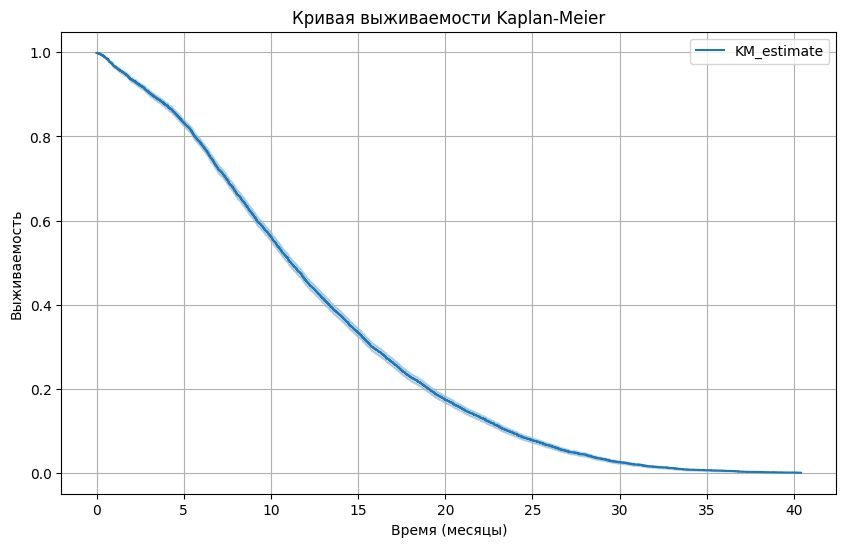

In [ ]:
# Фильтрация данных для анализа выживаемости
if "Overall Survival (Months)" in data.columns and "Patient's Vital Status" in data.columns:
    survival_data = data[["Overall Survival (Months)", "Patient's Vital Status"]].dropna()
    survival_data["Event"] = survival_data["Patient's Vital Status"].apply(lambda x: 0 if x == "Alive" else 1)

    # Kaplan-Meier анализ
    kmf = KaplanMeierFitter()
    kmf.fit(survival_data["Overall Survival (Months)"], event_observed=survival_data["Event"])

    # Построение кривой
    plt.figure(figsize=(10, 6))
    kmf.plot_survival_function()
    plt.title("Кривая выживаемости Kaplan-Meier")
    plt.xlabel("Время (месяцы)")
    plt.ylabel("Выживаемость")
    plt.grid()
    plt.show()


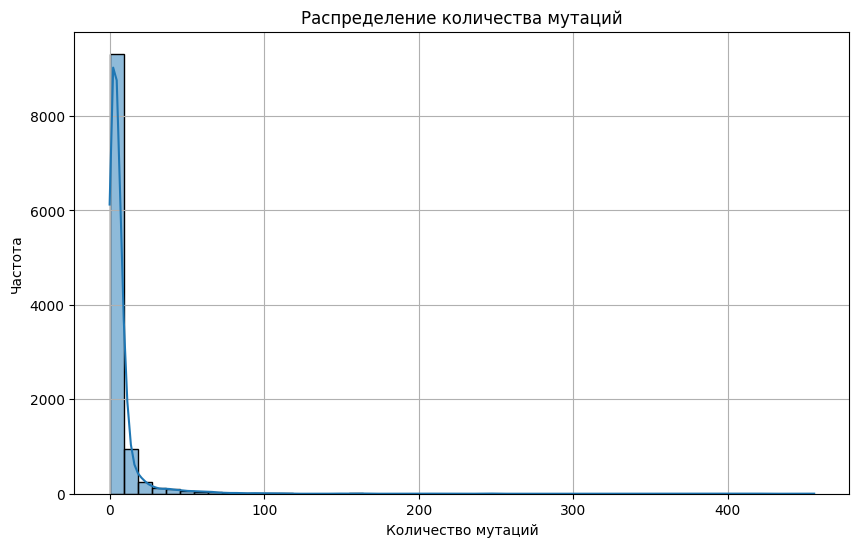

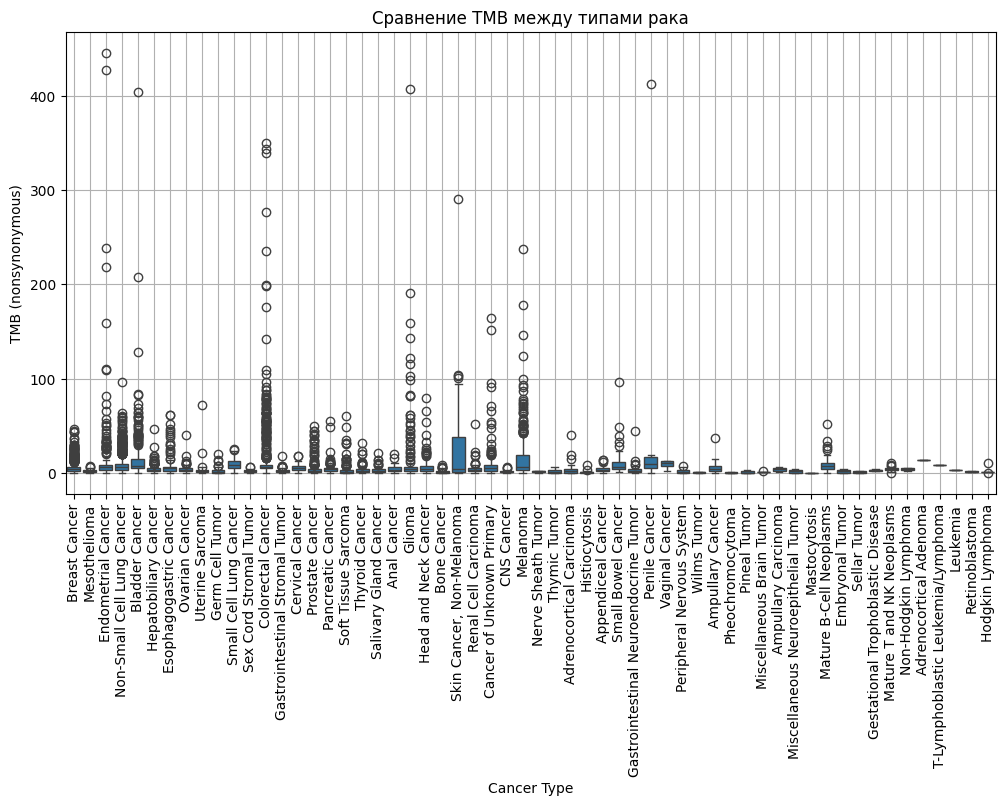

In [ ]:
# Гистограмма для количества мутаций
if "Mutation Count" in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data["Mutation Count"].dropna(), bins=50, kde=True)
    plt.title("Распределение количества мутаций")
    plt.xlabel("Количество мутаций")
    plt.ylabel("Частота")
    plt.grid()
    plt.show()

# Boxplot для TMB по типам рака
if "Cancer Type" in data.columns and "TMB (nonsynonymous)" in data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Cancer Type", y="TMB (nonsynonymous)", data=data)
    plt.title("Сравнение TMB между типами рака")
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()


Корреляция между ключевыми показателями:
                           Mutation Count  TMB (nonsynonymous)  \
Mutation Count                   1.000000             0.998434   
TMB (nonsynonymous)              0.998434             1.000000   
Overall Survival (Months)       -0.032108            -0.025675   

                           Overall Survival (Months)  
Mutation Count                             -0.032108  
TMB (nonsynonymous)                        -0.025675  
Overall Survival (Months)                   1.000000  


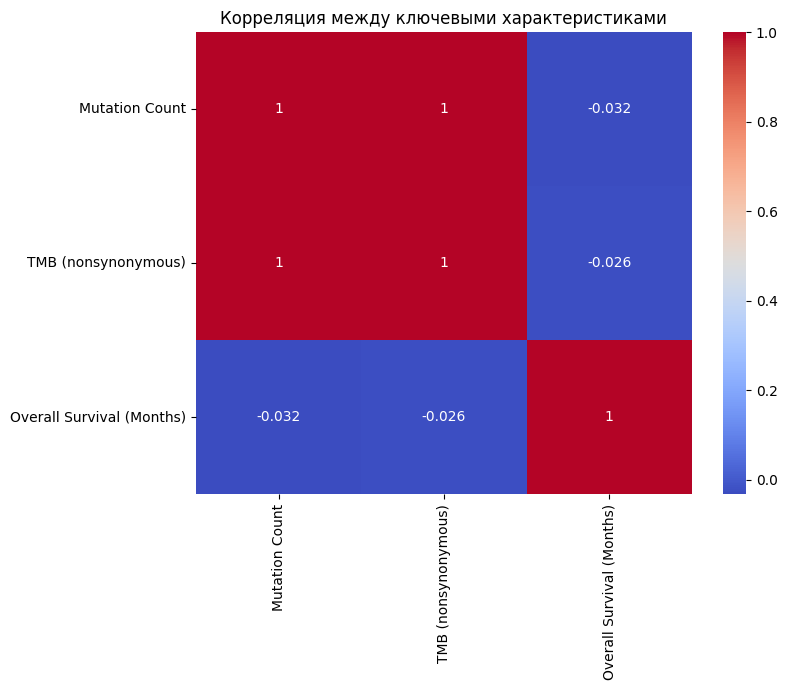

In [ ]:
# Корреляция между количеством мутаций, TMB и выживаемостью
if "Mutation Count" in data.columns and "Overall Survival (Months)" in data.columns:
    correlation = data[["Mutation Count", "TMB (nonsynonymous)", "Overall Survival (Months)"]].corr()
    print("Корреляция между ключевыми показателями:")
    print(correlation)

# Визуализация корреляционной матрицы
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap="coolwarm")
    plt.title("Корреляция между ключевыми характеристиками")
    plt.show()

In [ ]:
# Просмотр всех колонок
print("Названия колонок в датасете:")
print(data.columns)

Названия колонок в датасете:
Index(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered',
       'Matched Status', 'Metastatic Site', 'Mutation Count', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Primary Tumor Site', 'Sample Class', 'Sample Collection Source',
       'Number of Samples Per Patient', 'Sample coverage', 'Sample Type',
       'Sex', 'Smoking History', 'Somatic Status',
       'Specimen Preservation Type', 'Specimen Type', 'TMB (nonsynonymous)',
       'Tumor Purity', 'Patient's Vital Status'],
      dtype='object')


In [ ]:
# Загрузка второго датасета с генами (например, HierCluster.csv)
gene_data_path = 'HierCluster.csv'  # Поменяйте путь на актуальный
gene_data = pd.read_csv(gene_data_path)

# Просмотр структуры данных
print("Информация о датасете с генами:")
print(gene_data.info())

# Первые строки датасета
print("\nПервые строки датасета с генами:")
print(gene_data.head())

Информация о датасете с генами:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 1000 entries, Case to CXCL12
dtypes: float64(999), object(1)
memory usage: 7.6+ MB
None

Первые строки датасета с генами:
               Case      H1-0     RASD1     STAB1     FSCN1    SLC7A5  \
0      TCGA-G8-6326 -0.961066  0.181566 -0.013844 -0.629145  0.004290   
1  TARGET-40-PARJXU  0.040192  2.740854 -0.158447  1.282035  2.264286   
2  TARGET-40-0A4I6O -0.434697  0.258918 -0.162356  1.546800  0.758072   
3  TARGET-20-PAWZLW  6.000730 -0.251308 -0.187881 -0.915657  3.540561   
4  TARGET-20-PAPXWI -0.140781 -0.251459 -0.065436  2.099210  0.609911   

     PPP1R3C      GATM     PROS1  SERPINA1  ...     TRIB1    CSRNP1      KLF6  \
0  -0.244673 -0.379926 -0.487172  1.290067  ... -0.405363 -0.455494 -0.422337   
1   0.044923 -0.446688 -0.272620 -0.252160  ... -0.400184  0.361374  1.568604   
2  11.251712  0.030134  2.922182 -0.245328  ... -0.520189 -0.410039 -0.392707   
3 

In [ ]:
# Импортируем библиотеки
import pandas as pd

# Пути к файлам
hier_cluster_path = '/content/HierCluster.2024-12-09.csv'  # Замените на путь к файлу
aliquot_path = '/content/aliquot.csv'  # Замените на путь к файлу

# Загрузка данных
hier_cluster_data = pd.read_csv(hier_cluster_path)
aliquot_data = pd.read_csv(aliquot_path)

# Преобразование идентификаторов для объединения
hier_cluster_data['case_submitter_id'] = hier_cluster_data['Case'].str.extract(r'([A-Z]+-\d+-\d+)')

# Объединение данных
merged_data = pd.merge(hier_cluster_data, aliquot_data, on='case_submitter_id', how='inner')

# Преобразование столбца aliquot_volume в числовой формат, некорректные значения заменяются на NaN
merged_data['aliquot_volume'] = pd.to_numeric(merged_data['aliquot_volume'], errors='coerce')

# Проверка числовых данных в aliquot_volume
print("Aliquot volume column statistics:")
print(merged_data['aliquot_volume'].describe())

# Обработка данных: выберем только числовые столбцы генов
gene_columns = hier_cluster_data.columns[1:-1]  # Все генные данные, кроме идентификаторов
gene_data = merged_data[gene_columns].apply(pd.to_numeric, errors='coerce')  # Убедимся, что данные числовые

# Вычисление корреляции между экспрессией генов и объемом аликвот (aliquot_volume)
correlations = gene_data.corrwith(merged_data['aliquot_volume'])

# Вывод генов, которые наиболее снижают риск (наибольшая отрицательная корреляция)
print("\nTop genes reducing recurrence risk:")
top_genes = correlations.nsmallest(10)
print(top_genes)

# Сохранение результатов в файл
output_path = 'gene_correlations.csv'
top_genes.to_csv(output_path, header=['Correlation'])
print(f"Results saved to {output_path}")



Aliquot volume column statistics:
count    8738.000000
mean       86.155031
std       135.851513
min         0.000000
25%        13.300000
50%        20.000000
75%        60.000000
max       400.000000
Name: aliquot_volume, dtype: float64

Top genes reducing recurrence risk:
EPAS1     -0.067053
PIK3CD    -0.049461
ZFP36L2   -0.048634
CTSZ      -0.047241
IRAK3     -0.046510
EGFR      -0.046241
TEAD1     -0.045632
ITGA4     -0.043515
ADGRF5    -0.042697
EFEMP1    -0.041847
dtype: float64
Results saved to gene_correlations.csv


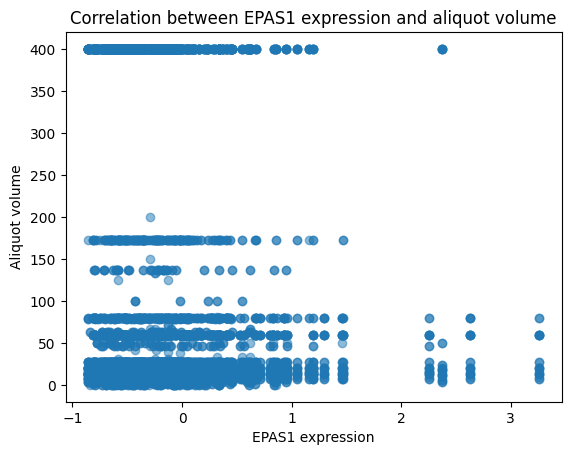

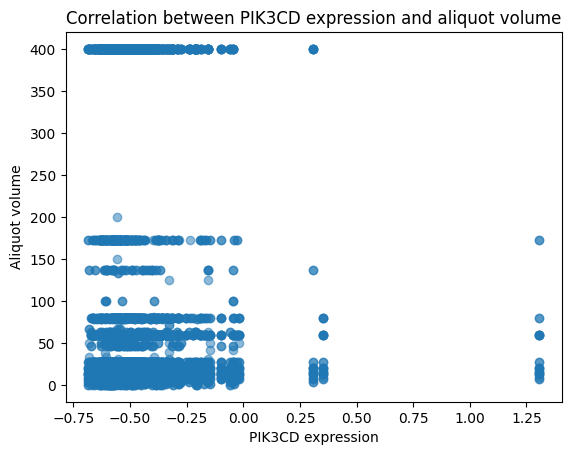

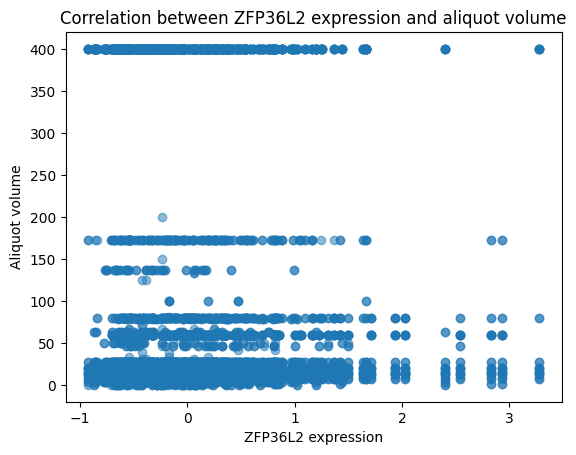

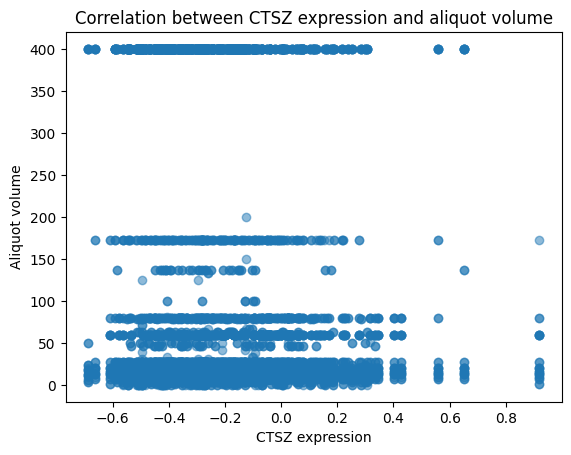

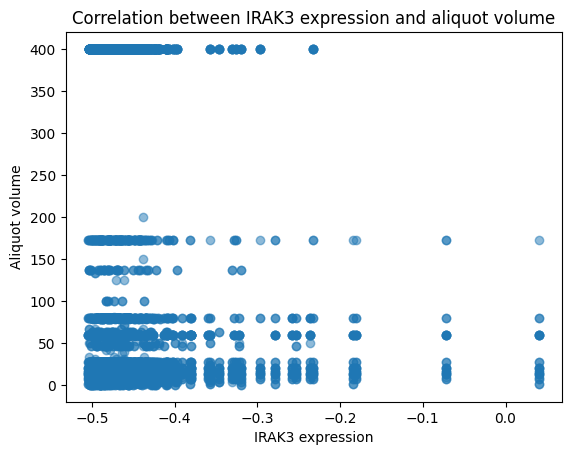

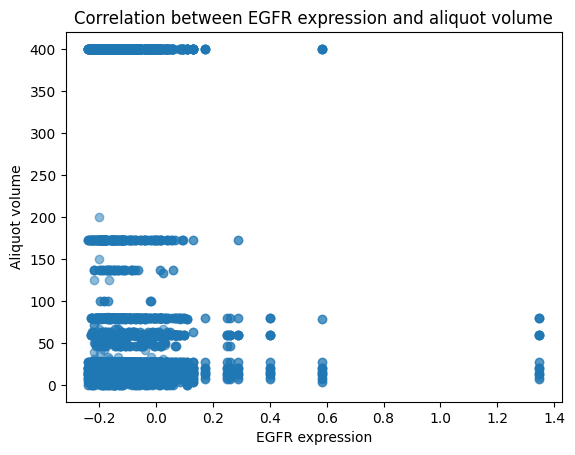

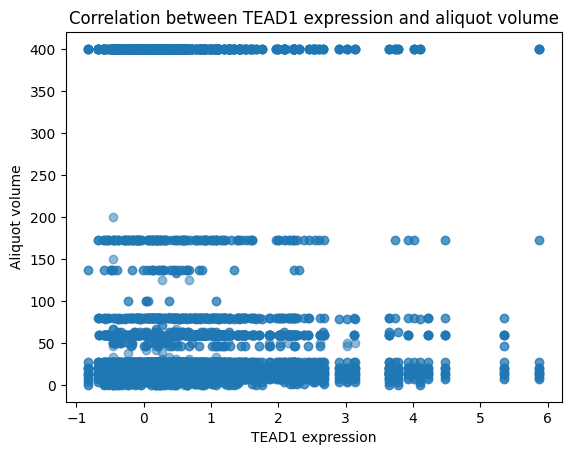

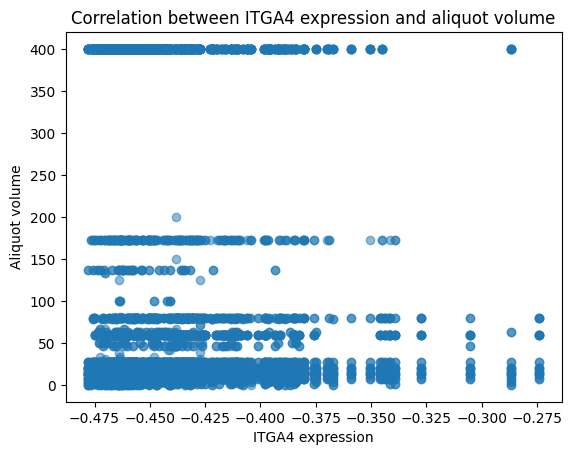

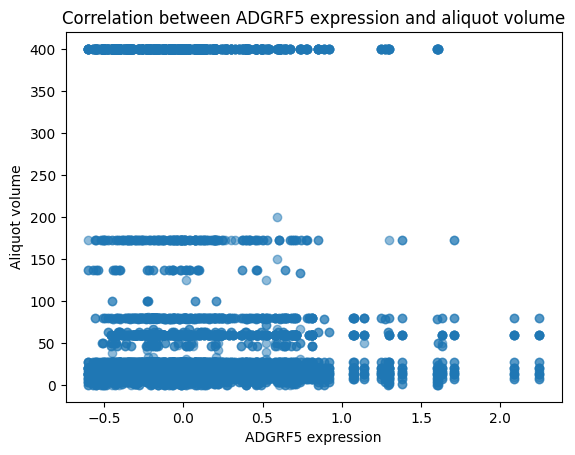

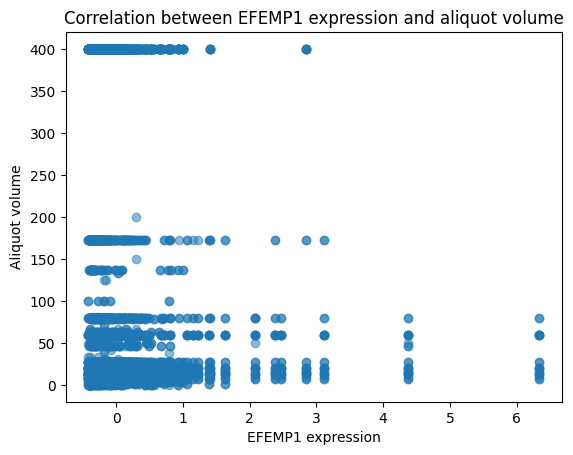

In [ ]:
import matplotlib.pyplot as plt

# Визуализация корреляции для топ-генов
top_gene = 'EPAS1'
plt.scatter(gene_data[top_gene], merged_data['aliquot_volume'], alpha=0.5)
plt.title(f'Correlation between {top_gene} expression and aliquot volume')
plt.xlabel(f'{top_gene} expression')
plt.ylabel('Aliquot volume')
plt.show()

top_gene = 'PIK3CD'
plt.scatter(gene_data[top_gene], merged_data['aliquot_volume'], alpha=0.5)
plt.title(f'Correlation between {top_gene} expression and aliquot volume')
plt.xlabel(f'{top_gene} expression')
plt.ylabel('Aliquot volume')
plt.show()

top_gene = 'ZFP36L2'
plt.scatter(gene_data[top_gene], merged_data['aliquot_volume'], alpha=0.5)
plt.title(f'Correlation between {top_gene} expression and aliquot volume')
plt.xlabel(f'{top_gene} expression')
plt.ylabel('Aliquot volume')
plt.show()

top_gene = 'CTSZ'
plt.scatter(gene_data[top_gene], merged_data['aliquot_volume'], alpha=0.5)
plt.title(f'Correlation between {top_gene} expression and aliquot volume')
plt.xlabel(f'{top_gene} expression')
plt.ylabel('Aliquot volume')
plt.show()

top_gene = 'IRAK3'
plt.scatter(gene_data[top_gene], merged_data['aliquot_volume'], alpha=0.5)
plt.title(f'Correlation between {top_gene} expression and aliquot volume')
plt.xlabel(f'{top_gene} expression')
plt.ylabel('Aliquot volume')
plt.show()

top_gene = 'EGFR'
plt.scatter(gene_data[top_gene], merged_data['aliquot_volume'], alpha=0.5)
plt.title(f'Correlation between {top_gene} expression and aliquot volume')
plt.xlabel(f'{top_gene} expression')
plt.ylabel('Aliquot volume')
plt.show()

top_gene = 'TEAD1'
plt.scatter(gene_data[top_gene], merged_data['aliquot_volume'], alpha=0.5)
plt.title(f'Correlation between {top_gene} expression and aliquot volume')
plt.xlabel(f'{top_gene} expression')
plt.ylabel('Aliquot volume')
plt.show()

top_gene = 'ITGA4'
plt.scatter(gene_data[top_gene], merged_data['aliquot_volume'], alpha=0.5)
plt.title(f'Correlation between {top_gene} expression and aliquot volume')
plt.xlabel(f'{top_gene} expression')
plt.ylabel('Aliquot volume')
plt.show()

top_gene = 'ADGRF5'
plt.scatter(gene_data[top_gene], merged_data['aliquot_volume'], alpha=0.5)
plt.title(f'Correlation between {top_gene} expression and aliquot volume')
plt.xlabel(f'{top_gene} expression')
plt.ylabel('Aliquot volume')
plt.show()

top_gene = 'EFEMP1'
plt.scatter(gene_data[top_gene], merged_data['aliquot_volume'], alpha=0.5)
plt.title(f'Correlation between {top_gene} expression and aliquot volume')
plt.xlabel(f'{top_gene} expression')
plt.ylabel('Aliquot volume')
plt.show()

In [ ]:
# Попробуй посмотреть на все гены
# Импортируем библиотеки
import pandas as pd

# Пути к файлам
hier_cluster_path = '/content/HierCluster.2024-12-09.csv'  # Замените на путь к файлу
aliquot_path = '/content/aliquot.csv'  # Замените на путь к файлу

# Загрузка данных
hier_cluster_data = pd.read_csv(hier_cluster_path)
aliquot_data = pd.read_csv(aliquot_path)

# Преобразование идентификаторов для объединения
hier_cluster_data['case_submitter_id'] = hier_cluster_data['Case'].str.extract(r'([A-Z]+-\d+-\d+)')

# Объединение данных по идентификатору case_submitter_id
merged_data = pd.merge(hier_cluster_data, aliquot_data, on='case_submitter_id', how='inner')

# Преобразование столбца aliquot_volume в числовой формат, некорректные значения заменяются на NaN
merged_data['aliquot_volume'] = pd.to_numeric(merged_data['aliquot_volume'], errors='coerce')

# Проверка статистики по столбцу aliquot_volume
print("Aliquot volume column statistics:")
print(merged_data['aliquot_volume'].describe())

# Обработка данных: выберем только числовые столбцы с данными о генах
gene_columns = hier_cluster_data.columns[1:-1]  # Все генные данные, кроме идентификаторов
gene_data = merged_data[gene_columns].apply(pd.to_numeric, errors='coerce')  # Убедимся, что данные числовые

# Вычисление корреляции между экспрессией генов и объемом аликвот (aliquot_volume)
correlations = gene_data.corrwith(merged_data['aliquot_volume'])

# Вывод всех генов с корреляцией
print("\nCorrelation between genes and aliquot volume:")
print(correlations)

# Сохранение результатов в файл
output_path = 'all_gene_correlations.csv'
correlations.to_csv(output_path, header=['Correlation'])  # Сохраняем все корреляции
print(f"Results saved to {output_path}")


Aliquot volume column statistics:
count    8738.000000
mean       86.155031
std       135.851513
min         0.000000
25%        13.300000
50%        20.000000
75%        60.000000
max       400.000000
Name: aliquot_volume, dtype: float64

Correlation between genes and aliquot volume:
H1-0      0.003225
RASD1     0.001064
STAB1    -0.038683
FSCN1     0.017179
SLC7A5   -0.000469
            ...   
NFKBIZ   -0.036926
TAGAP    -0.026389
MME      -0.002986
CAVIN2    0.014346
CXCL12   -0.032766
Length: 999, dtype: float64
Results saved to all_gene_correlations.csv


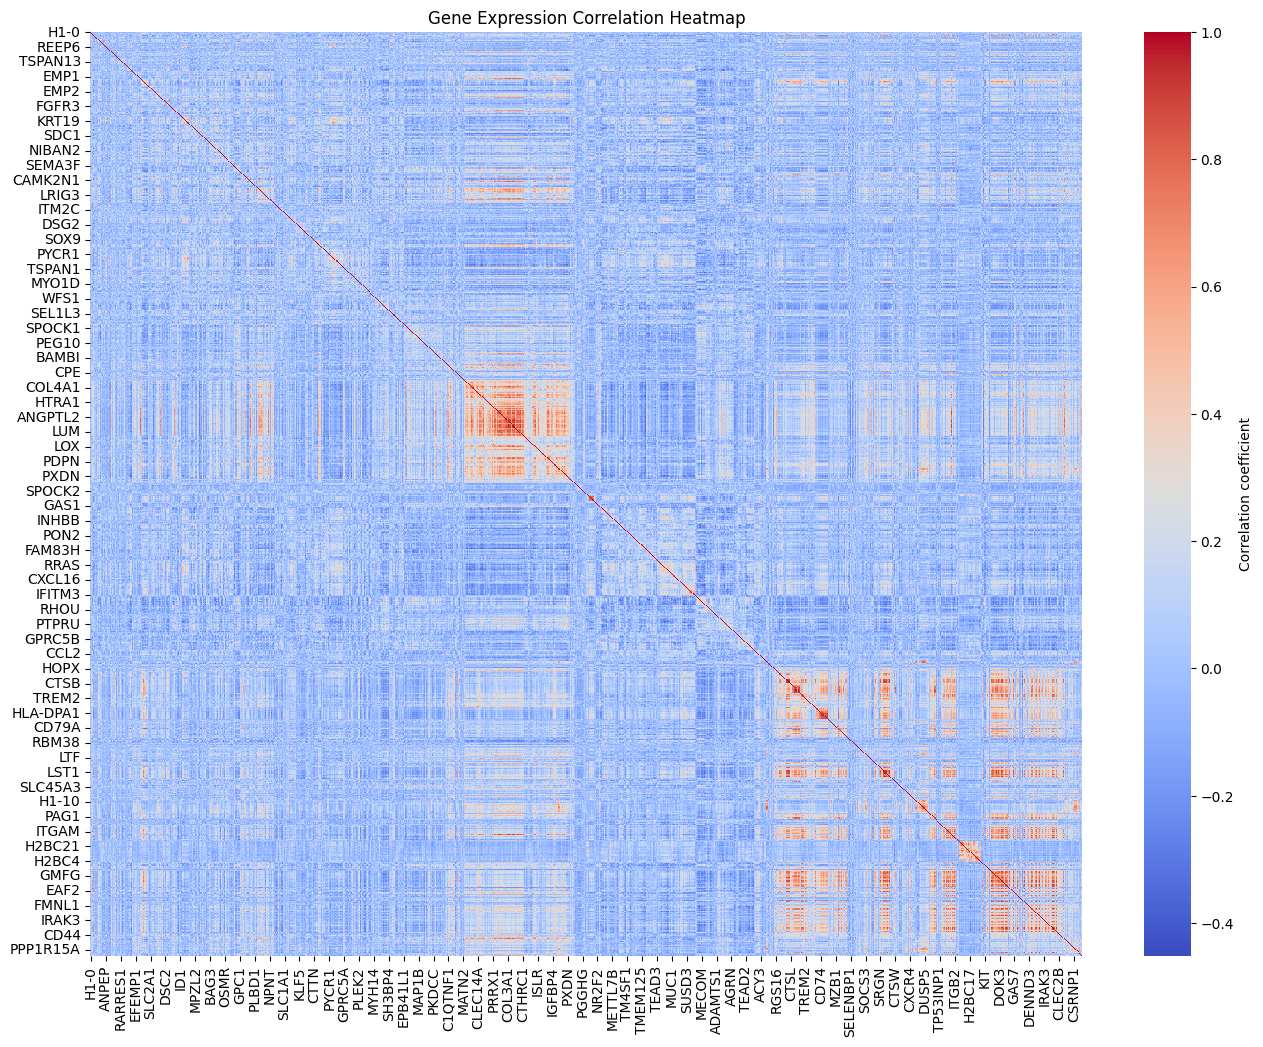

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Пути к файлам
hier_cluster_path = '/content/HierCluster.2024-12-09.csv'  # Замените на путь к файлу
aliquot_path = '/content/aliquot.csv'  # Замените на путь к файлу

# Загрузка данных
hier_cluster_data = pd.read_csv(hier_cluster_path)
aliquot_data = pd.read_csv(aliquot_path)

# Преобразование идентификаторов для объединения
hier_cluster_data['case_submitter_id'] = hier_cluster_data['Case'].str.extract(r'([A-Z]+-\d+-\d+)')

# Объединение данных по идентификатору case_submitter_id
merged_data = pd.merge(hier_cluster_data, aliquot_data, on='case_submitter_id', how='inner')

# Преобразование столбца aliquot_volume в числовой формат, некорректные значения заменяются на NaN
merged_data['aliquot_volume'] = pd.to_numeric(merged_data['aliquot_volume'], errors='coerce')

# Выбираем только числовые столбцы с данными о генах
gene_columns = hier_cluster_data.columns[1:-1]  # Все генные данные, кроме идентификаторов
gene_data = merged_data[gene_columns].apply(pd.to_numeric, errors='coerce')  # Убедимся, что данные числовые

# Вычисление корреляции между всеми генами
correlation_matrix = gene_data.corr()

# Построение тепловой карты
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Gene Expression Correlation Heatmap')
plt.show()

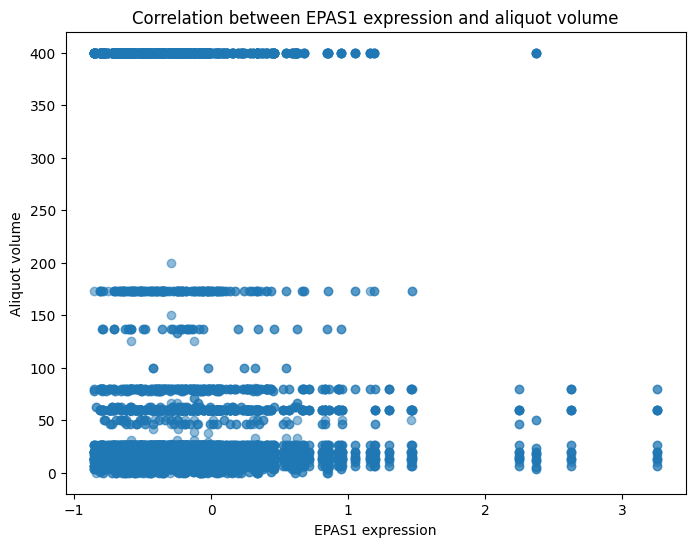

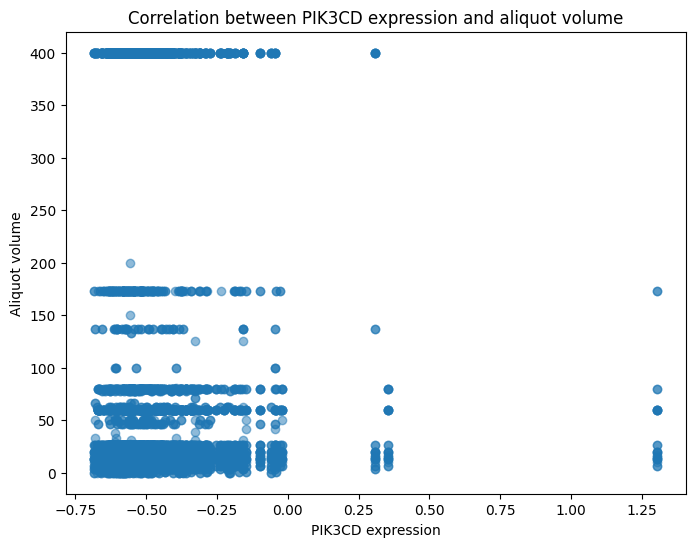

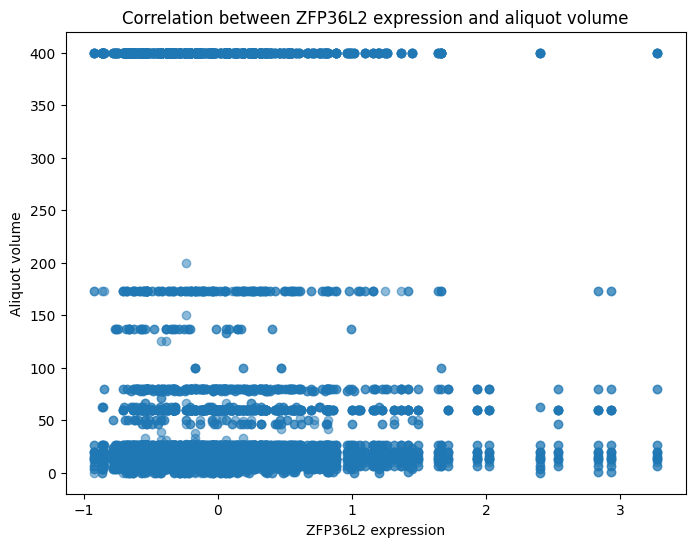

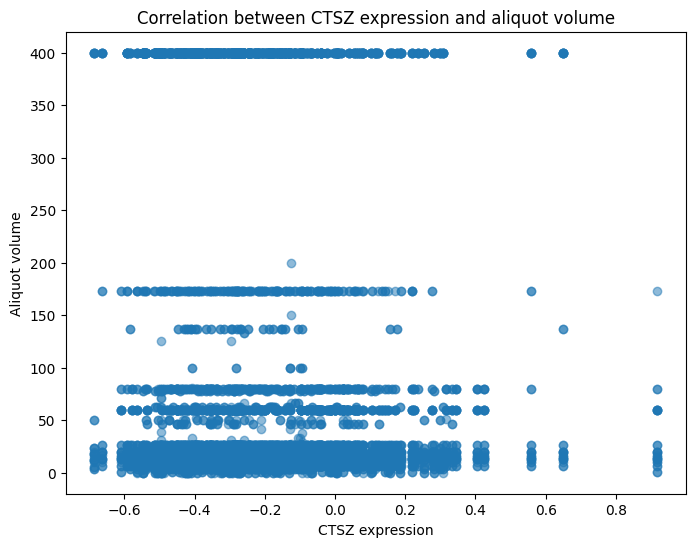

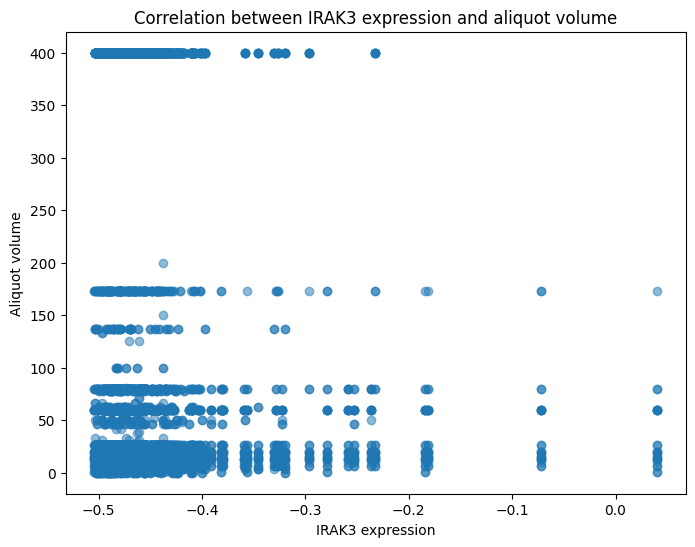

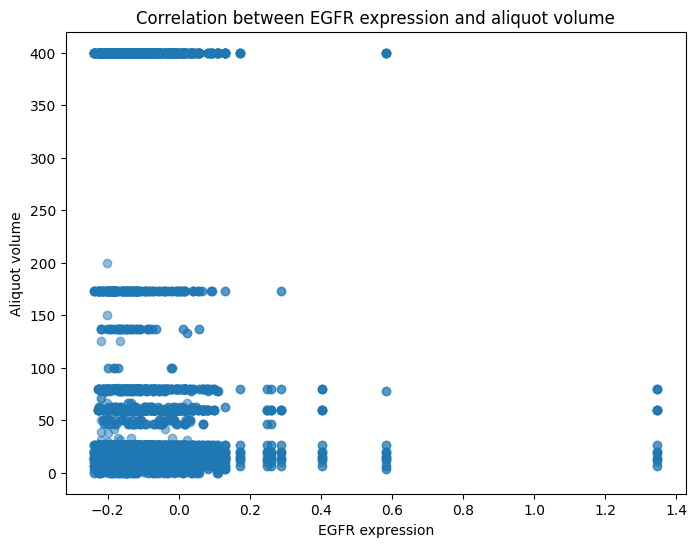

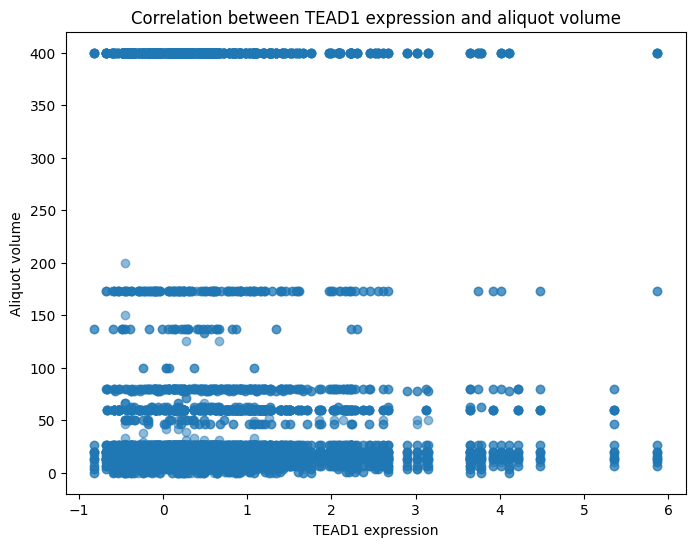

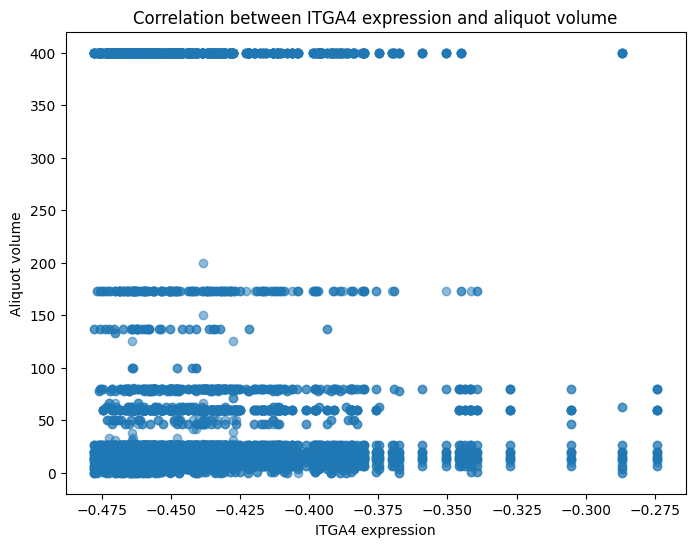

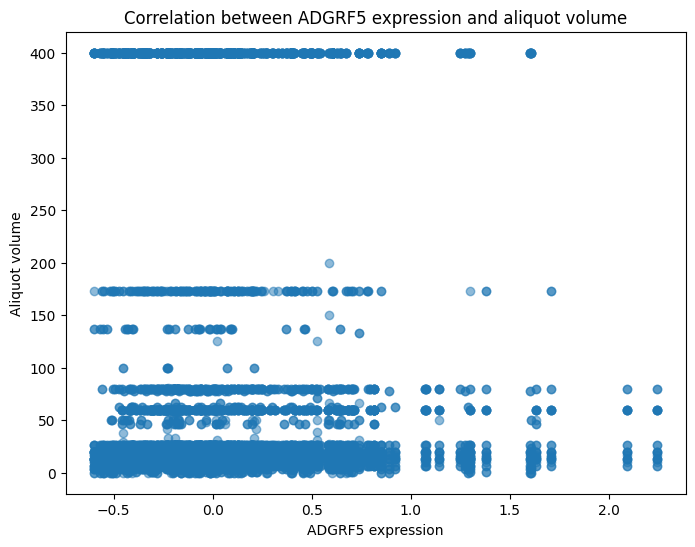

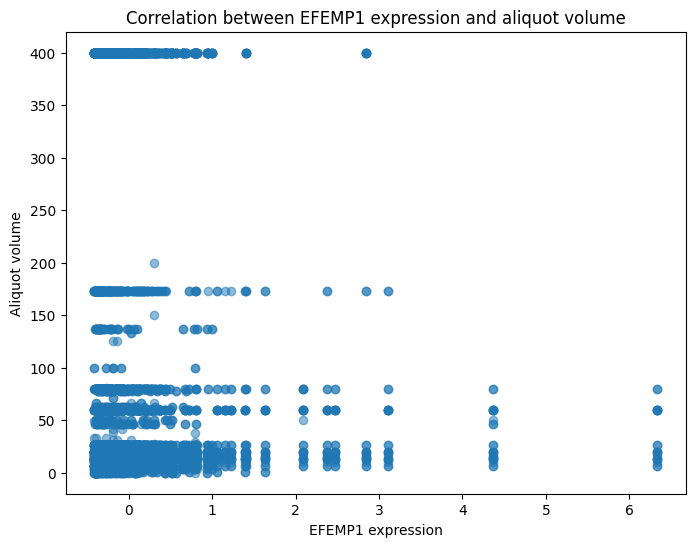

In [ ]:
import matplotlib.pyplot as plt

# Гены для анализа
genes = ['EPAS1', 'PIK3CD', 'ZFP36L2', 'CTSZ', 'IRAK3', 'EGFR', 'TEAD1', 'ITGA4', 'ADGRF5', 'EFEMP1']

# Создание графиков рассеяния для каждого гена
for gene in genes:
    plt.figure(figsize=(8, 6))
    plt.scatter(merged_data[gene], merged_data['aliquot_volume'], alpha=0.5)
    plt.title(f'Correlation between {gene} expression and aliquot volume')
    plt.xlabel(f'{gene} expression')
    plt.ylabel('Aliquot volume')
    plt.show()

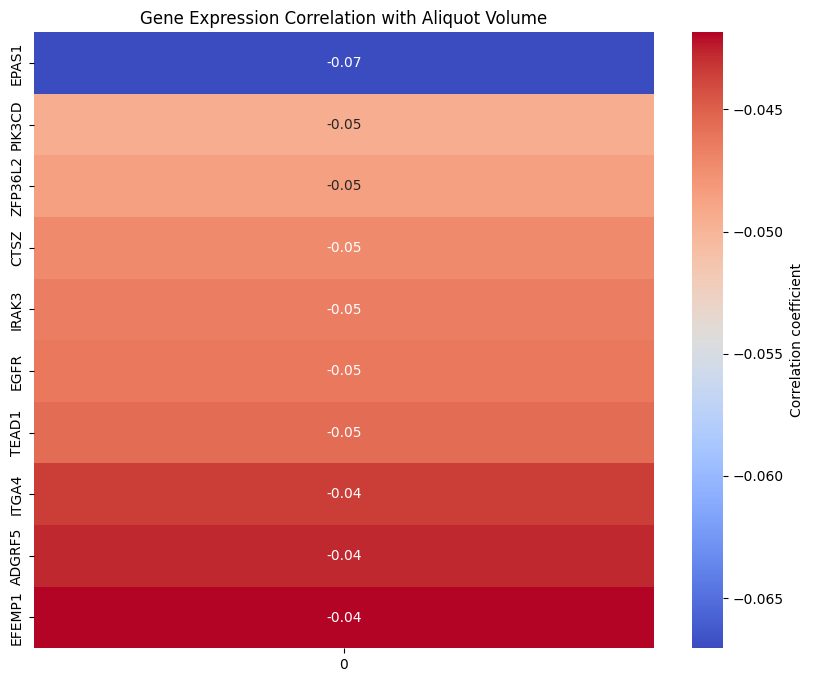

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Рассчитываем корреляцию между генами и объемом аликвот
selected_genes_data = merged_data[genes]
correlation_matrix = selected_genes_data.corrwith(merged_data['aliquot_volume'])

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Gene Expression Correlation with Aliquot Volume')
plt.show()

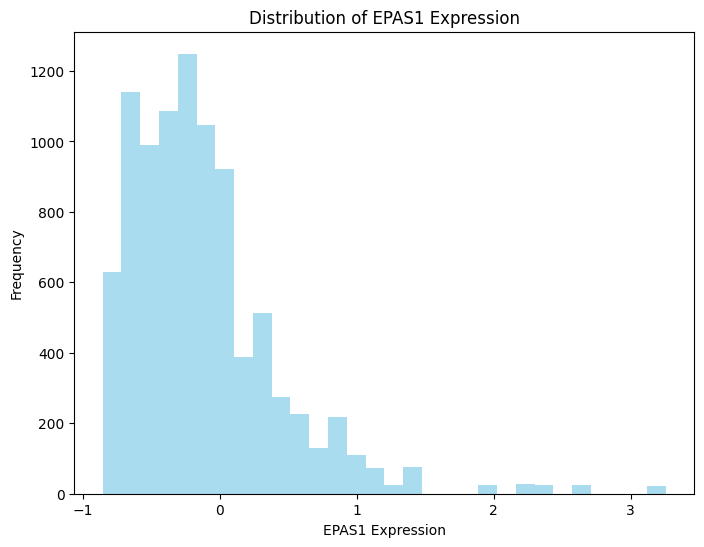

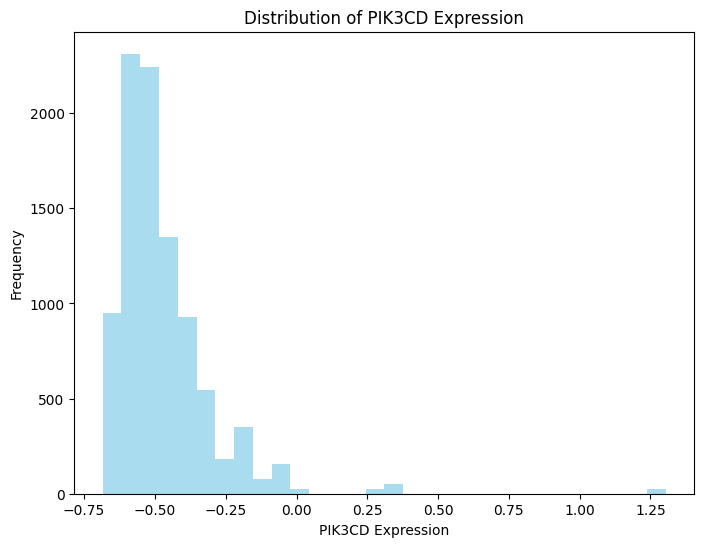

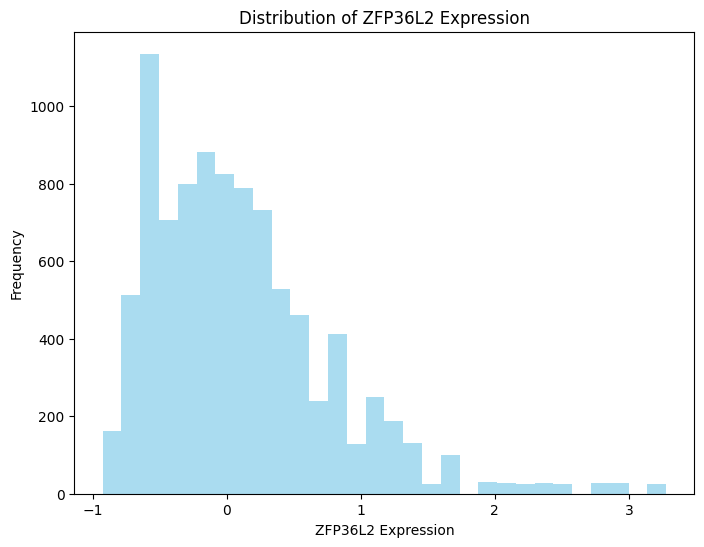

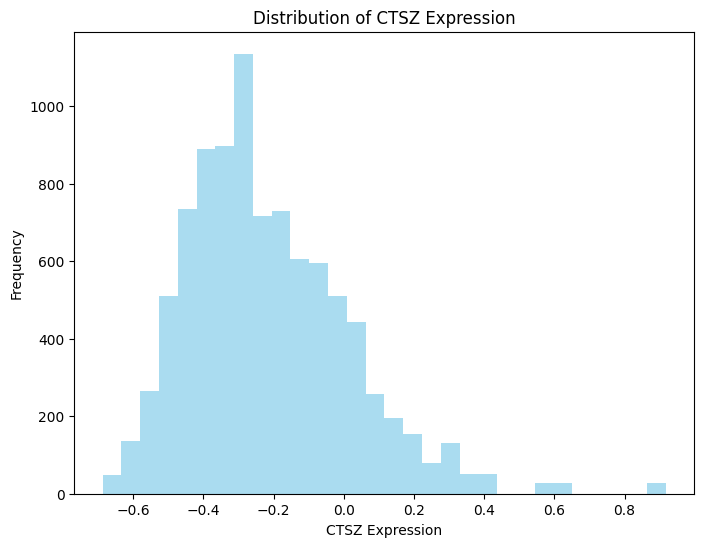

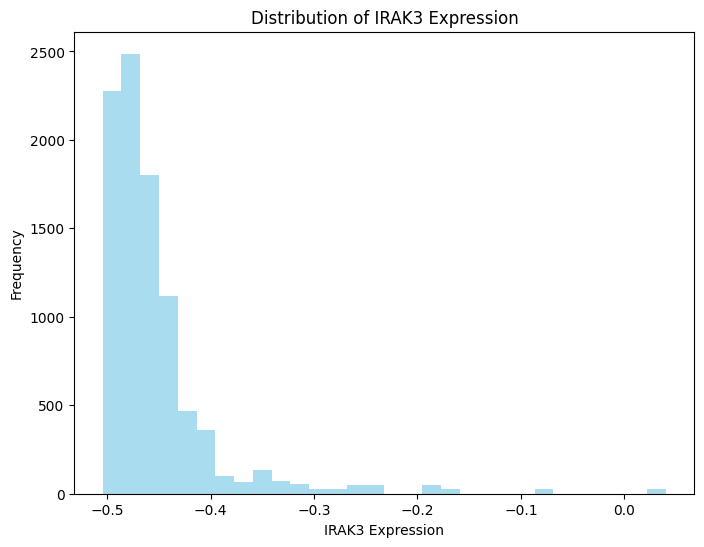

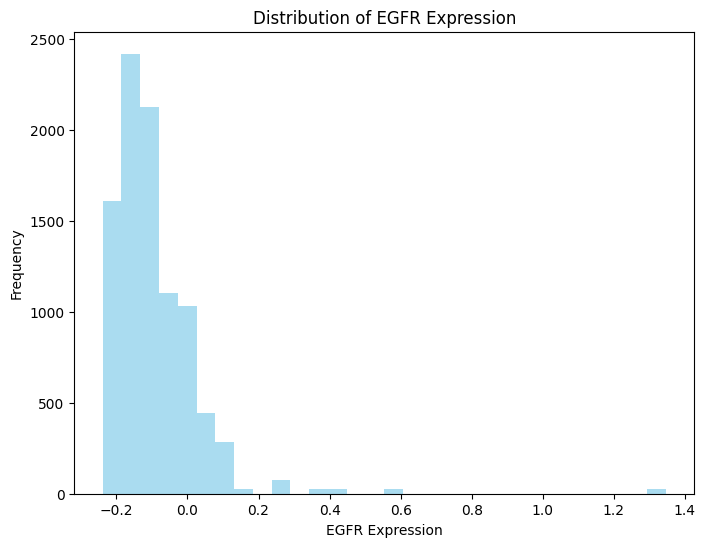

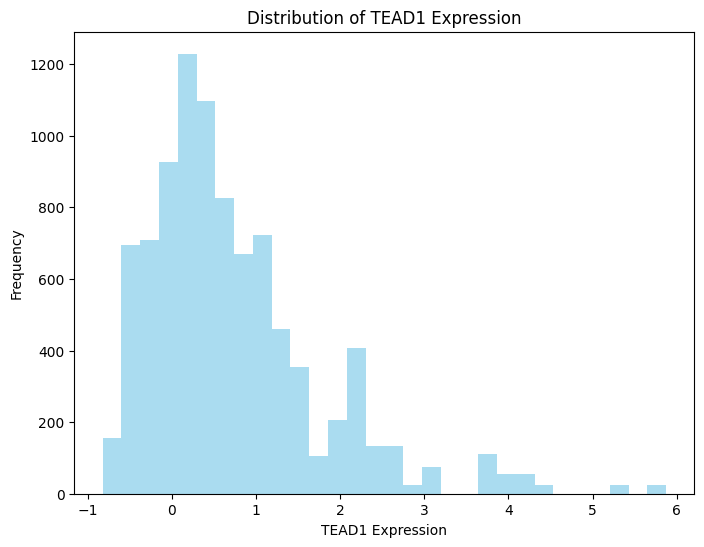

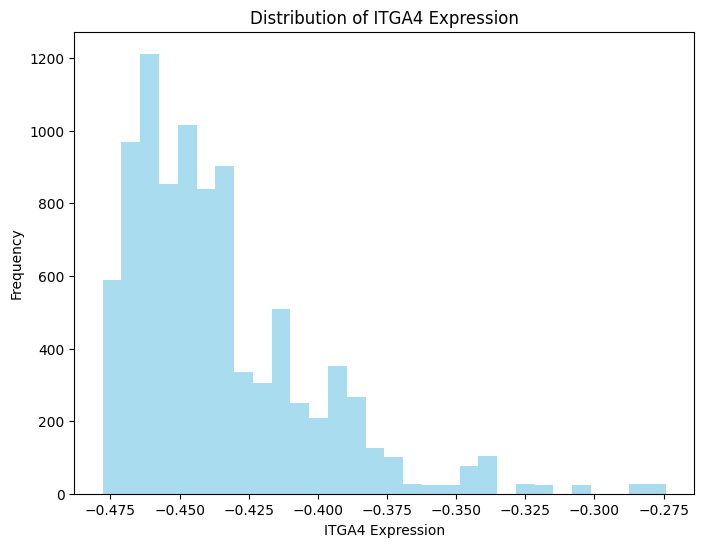

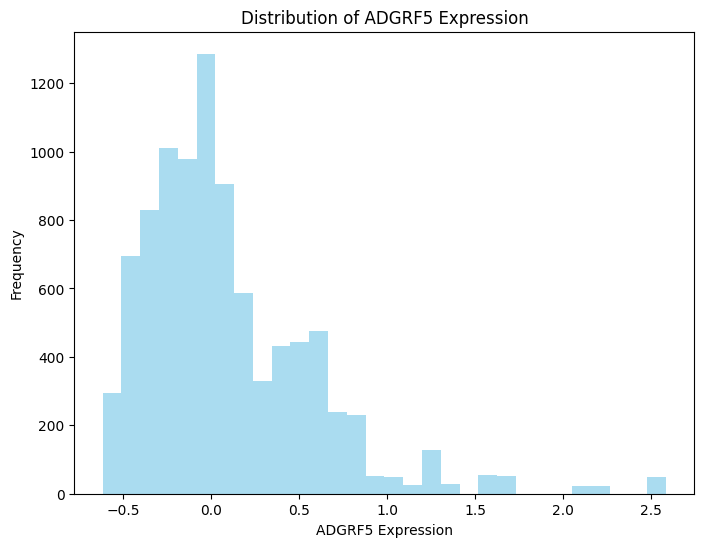

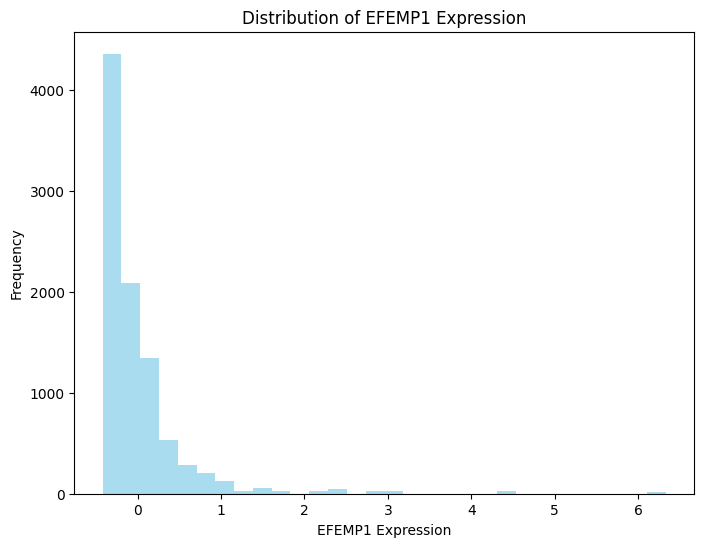

In [ ]:
# Строим гистограмму для каждого гена
for gene in genes:
    plt.figure(figsize=(8, 6))
    plt.hist(merged_data[gene].dropna(), bins=30, alpha=0.7, color='skyblue')
    plt.title(f'Distribution of {gene} Expression')
    plt.xlabel(f'{gene} Expression')
    plt.ylabel('Frequency')
    plt.show()

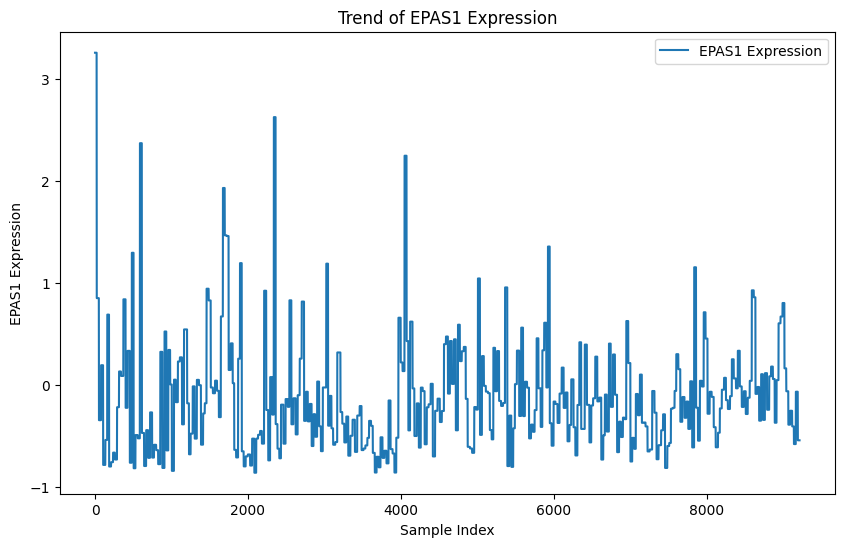

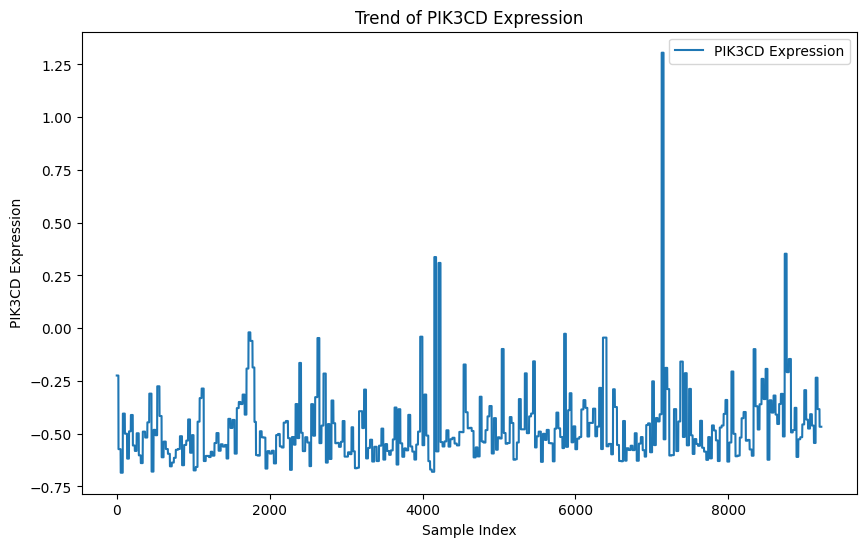

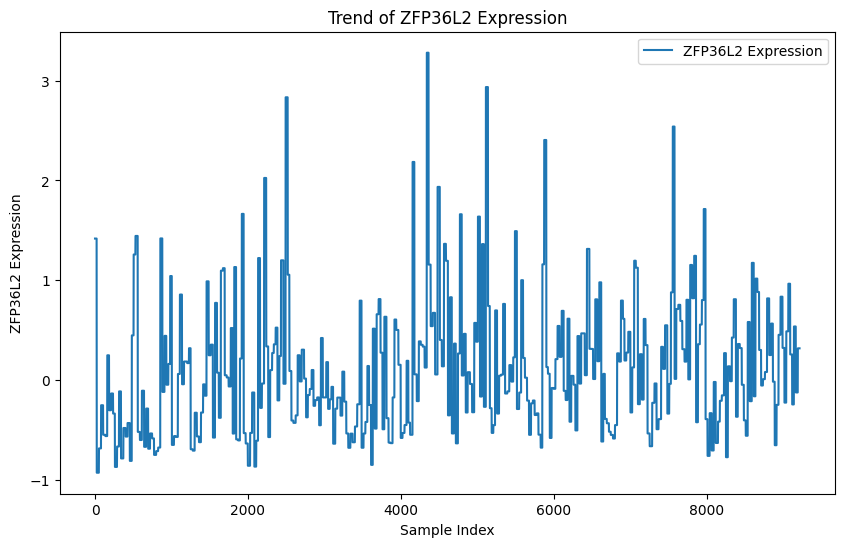

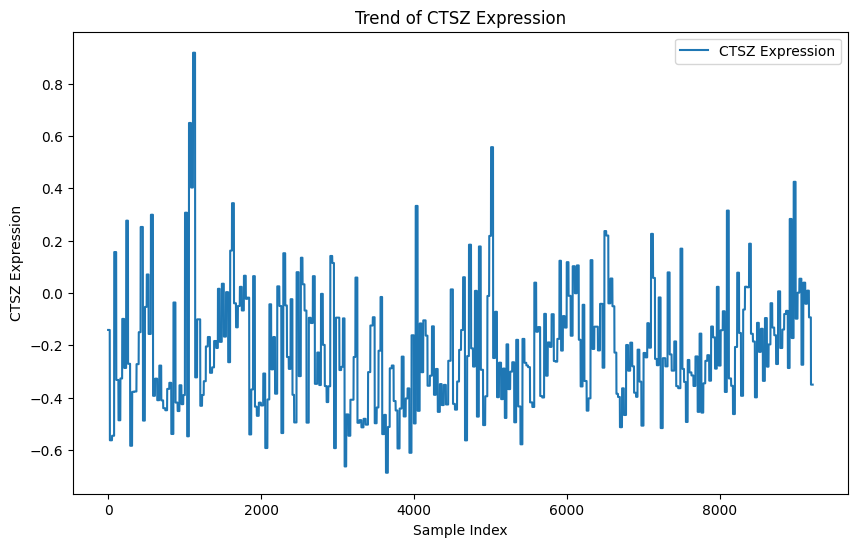

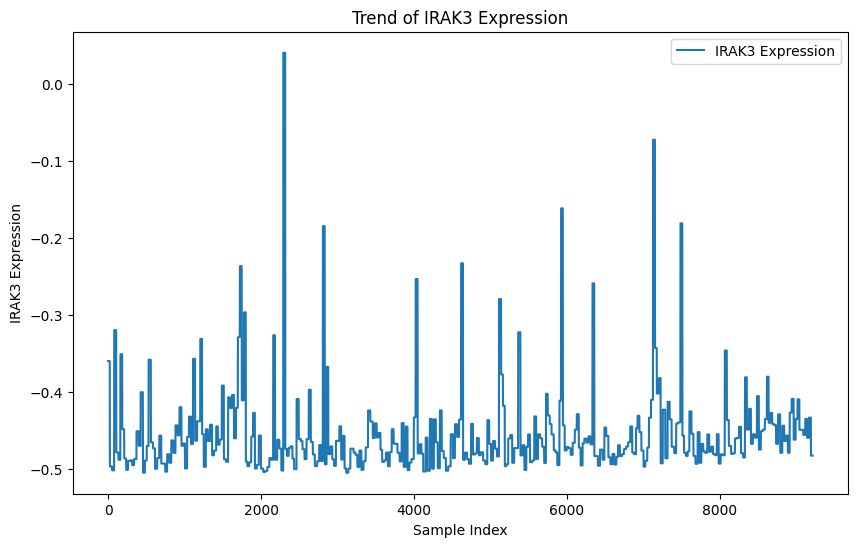

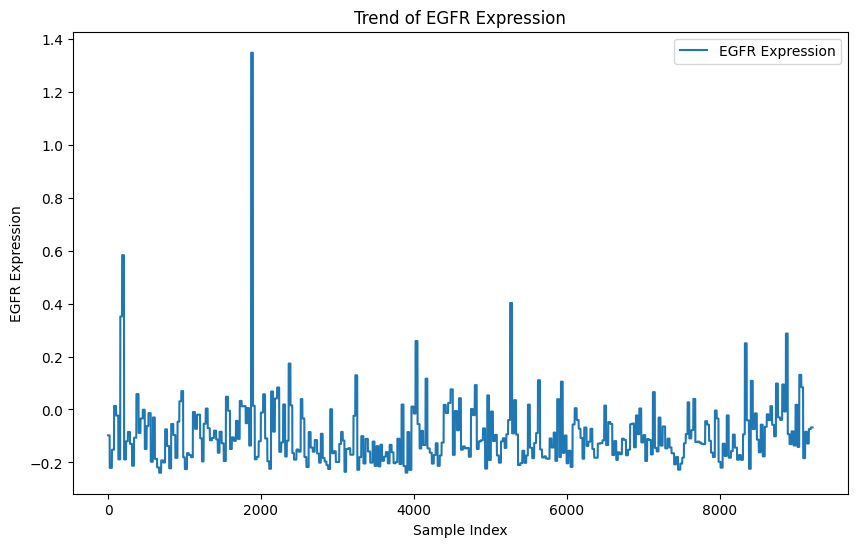

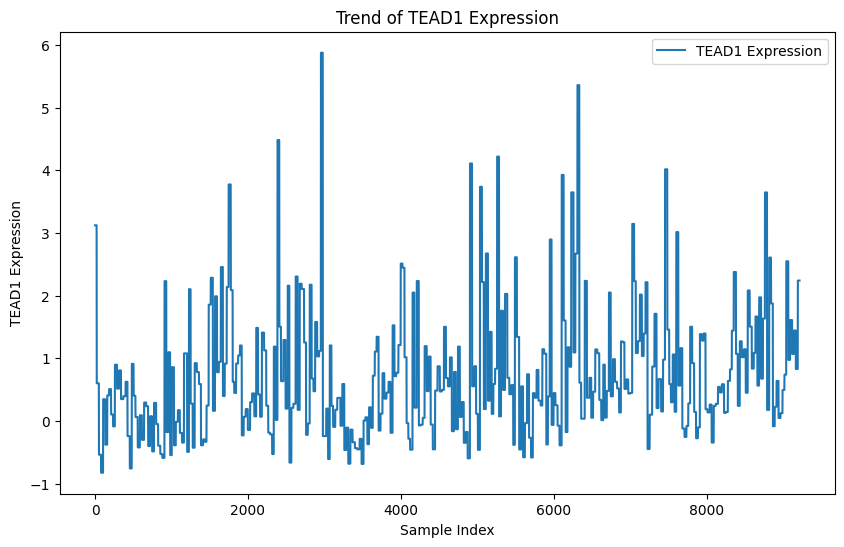

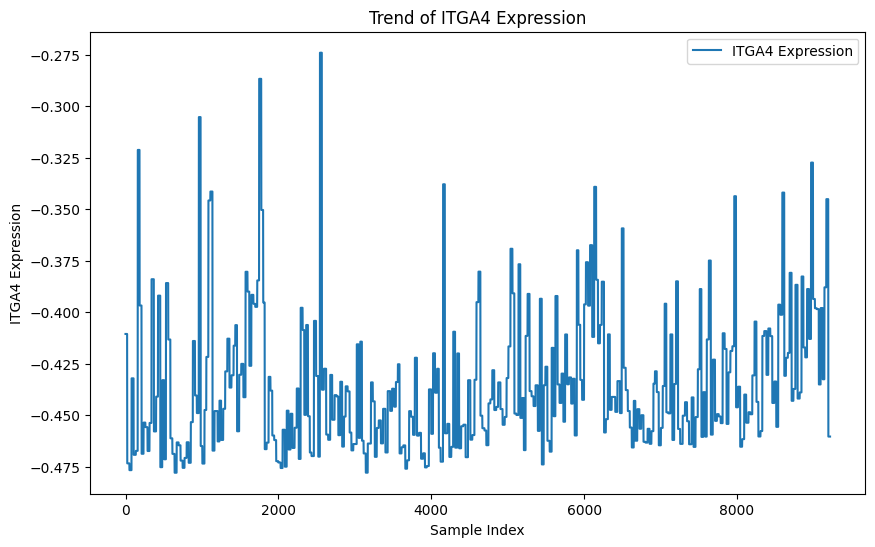

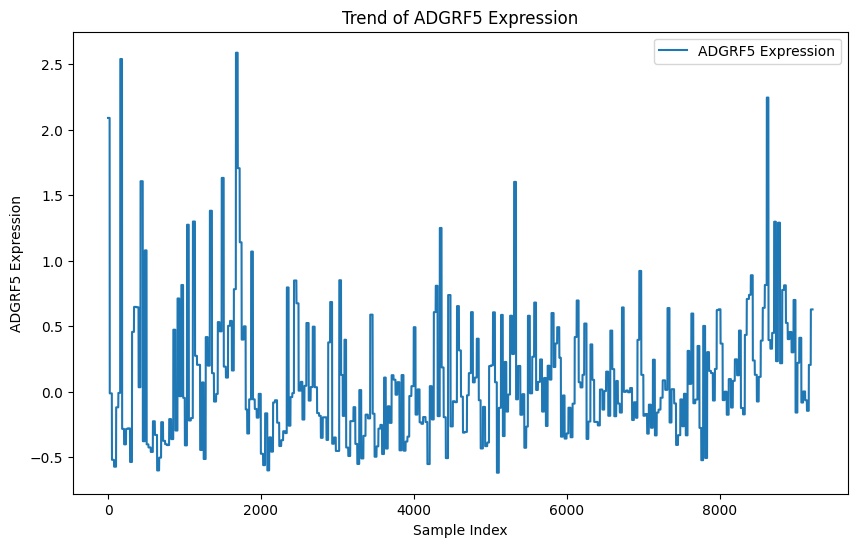

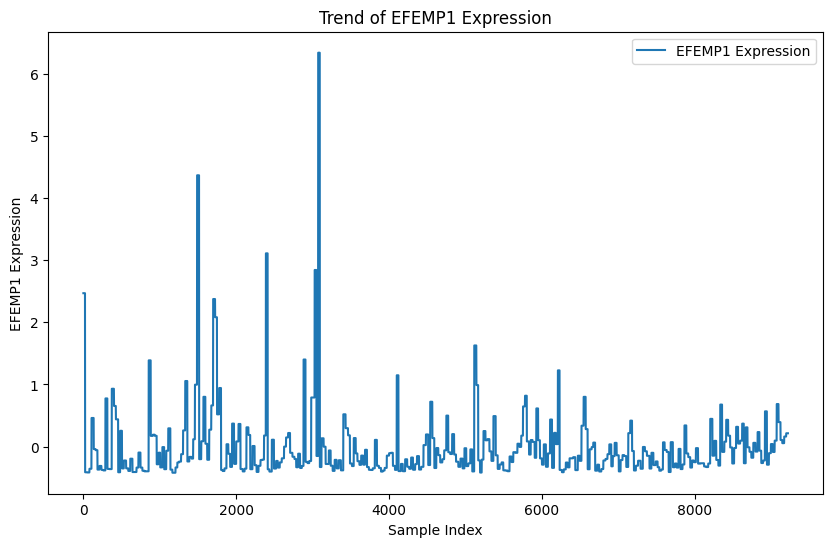

In [ ]:
# Пример линейного графика для каждого гена
for gene in genes:
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data[gene].dropna().reset_index(drop=True), label=f'{gene} Expression')
    plt.title(f'Trend of {gene} Expression')
    plt.xlabel('Sample Index')
    plt.ylabel(f'{gene} Expression')
    plt.legend()
    plt.show()

In [ ]:
# Просмотрим все столбцы данных
print(merged_data.columns)

Index(['Case', 'H1-0', 'RASD1', 'STAB1', 'FSCN1', 'SLC7A5', 'PPP1R3C', 'GATM',
       'PROS1', 'SERPINA1',
       ...
       'no_matched_normal_low_pass_wgs',
       'no_matched_normal_targeted_sequencing', 'no_matched_normal_wgs',
       'no_matched_normal_wxs', 'selected_normal_low_pass_wgs',
       'selected_normal_targeted_sequencing', 'selected_normal_wgs',
       'selected_normal_wxs', 'source_center', 'state'],
      dtype='object', length=1027)


In [ ]:
# Загрузим данные с параметром low_memory=False, чтобы избежать предупреждений
merged_data = pd.read_csv('merged_data.csv', low_memory=False)

# Просмотрим все столбцы
print(merged_data.columns)

Index(['Case', 'H1-0', 'RASD1', 'STAB1', 'FSCN1', 'SLC7A5', 'PPP1R3C', 'GATM',
       'PROS1', 'SERPINA1',
       ...
       'no_matched_normal_low_pass_wgs',
       'no_matched_normal_targeted_sequencing', 'no_matched_normal_wgs',
       'no_matched_normal_wxs', 'selected_normal_low_pass_wgs',
       'selected_normal_targeted_sequencing', 'selected_normal_wgs',
       'selected_normal_wxs', 'source_center', 'state'],
      dtype='object', length=1027)


In [ ]:
import pandas as pd

# Загрузка файла (загрузите ваш CSV-файл в Google Colab через вкладку "Файлы")
file_path = '/content/all_gene_correlations.csv'  # Укажите путь к вашему файлу
data = pd.read_csv(file_path)

In [ ]:
data.head()

Unnamed: 0  Correlation
0       H1-0     0.003225
1      RASD1     0.001064
2      STAB1    -0.038683
3      FSCN1     0.017179
4     SLC7A5    -0.000469

In [ ]:
data.columns = ['Gene', 'Correlation']  # Замените названия на актуальные

In [ ]:
# Топ-10 генов с самой высокой корреляцией
top_10_genes = data.sort_values(by='Correlation', ascending=False).head(10)
print(top_10_genes)

          Gene  Correlation
92       HSPB1     0.064304
654      PSAT1     0.064086
41       GSTP1     0.061594
674  MTRNR2L12     0.058015
531       UCP2     0.057036
775       HBA2     0.053303
524     CYSTM1     0.053117
833       JUND     0.052459
582      PPDPF     0.048373
663       PTMS     0.046419


In [ ]:
# Далее по объединенному набору данных можно строить нужные модели обучения, интересующие исследователя